In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# 展示图片

In [2]:
img_dir = '../output_video'

In [3]:
image_path = img_dir + '/player_1.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

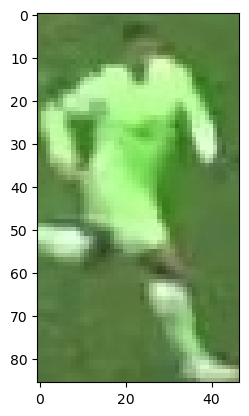

In [5]:
plt.imshow(image)
plt.show()

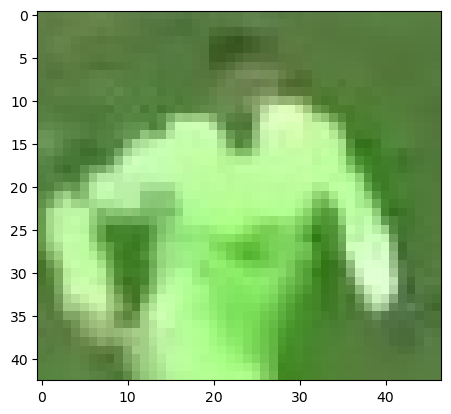

In [6]:
# 选取上半区域
top_half = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half)
plt.show()

# 颜色聚类

In [8]:
# 重塑为2D数组
image_2d = top_half.reshape(-1, 3)
